In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from math import pi

%matplotlib notebook

print("Tensorflow version: {0}".format(tf.__version__))

Tensorflow version: 2.0.0-beta1


In [2]:
train_vals = pd.read_csv('train_values.csv')
train_labs = pd.read_csv('train_labels.csv')
test_vals = pd.read_csv('test_values.csv')

In [3]:
print("Training values nans: {0}".format(train_vals.isnull().values.sum()))
print("Training labels nans: {0}".format(train_labs.isnull().values.sum()))
print("Testing values nans: {0}".format(test_vals.isnull().values.sum()))

Training values nans: 0
Training labels nans: 0
Testing values nans: 0


In [4]:
train_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_labs.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
def make_one_hot(df, col_name, new_col_prefix):
    dist_vals = df[col_name].unique()
    for i in dist_vals:
        df["{0}_{1}".format(new_col_prefix,i)] = (df[col_name] == i).astype(int)
    df.drop(columns=[col_name,], inplace=True)

In [7]:
make_one_hot(train_vals, 'land_surface_condition', 'lsc')
make_one_hot(train_vals, 'foundation_type', 'ftyp')
make_one_hot(train_vals, 'roof_type', 'rtyp')
make_one_hot(train_vals, 'ground_floor_type', 'gft')
make_one_hot(train_vals, 'other_floor_type', 'oft')
make_one_hot(train_vals, 'position', 'pos')
make_one_hot(train_vals, 'plan_configuration', 'pconf')
make_one_hot(train_vals, 'legal_ownership_status', 'los')

In [8]:
make_one_hot(test_vals, 'land_surface_condition', 'lsc')
make_one_hot(test_vals, 'foundation_type', 'ftyp')
make_one_hot(test_vals, 'roof_type', 'rtyp')
make_one_hot(test_vals, 'ground_floor_type', 'gft')
make_one_hot(test_vals, 'other_floor_type', 'oft')
make_one_hot(test_vals, 'position', 'pos')
make_one_hot(test_vals, 'plan_configuration', 'pconf')
make_one_hot(test_vals, 'legal_ownership_status', 'los')

In [9]:
make_one_hot(train_labs, 'damage_grade', 'dg')

In [10]:
print('Train dataset shape: {0}'.format(train_vals.shape))
print('Test dataset shape: {0}'.format(test_vals.shape))

Train dataset shape: (260601, 69)
Test dataset shape: (86868, 69)


In [11]:
train_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,pconf_m,pconf_c,pconf_a,pconf_n,pconf_f,pconf_o,los_v,los_a,los_r,los_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,1,0,0,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,1,0,0,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,1,0,0,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,1,0,0,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
train_labs.head()

,building_id,dg_3,dg_2,dg_1
0,802906,1,0,0
1,28830,0,1,0
2,94947,1,0,0
3,590882,0,1,0
4,201944,1,0,0


In [13]:
test_vals.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,pconf_c,pconf_m,pconf_s,pconf_o,pconf_f,pconf_n,los_v,los_a,los_w,los_r
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,0,0,1,0,0,0
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,0,0,1,0,0,0
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,0,0,1,0,0,0
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,0,0,1,0,0,0
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>


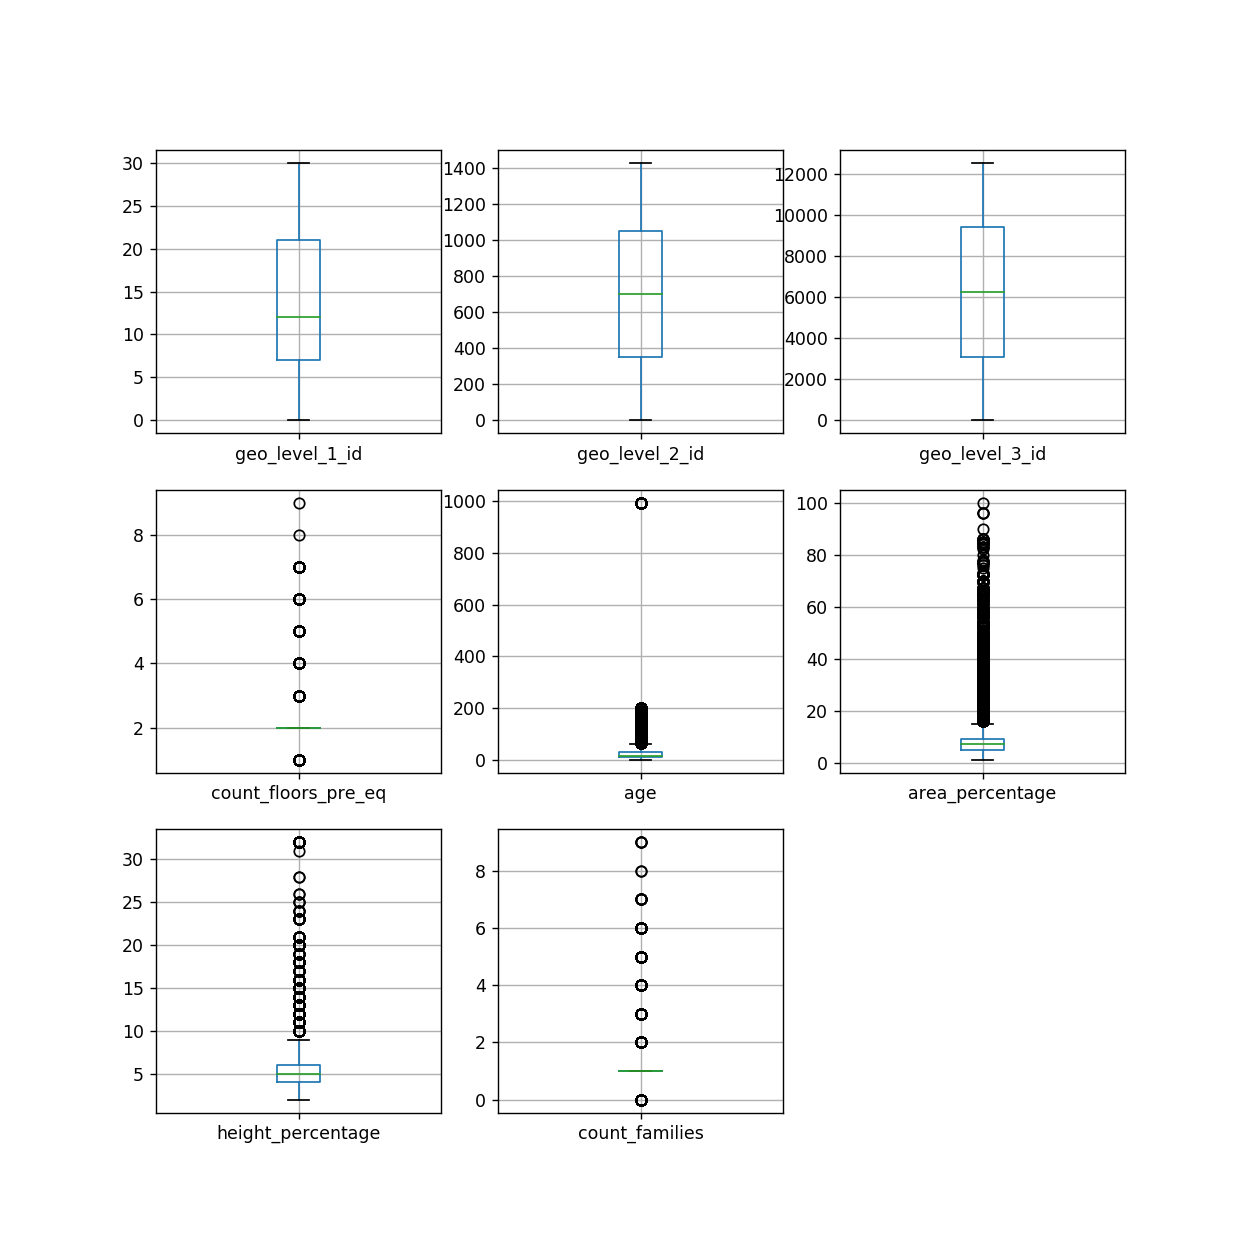

In [14]:
int_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'count_families']
fig = plt.figure(figsize=(10,10))
for idx, i in enumerate(int_cols):
    plt.subplot(3,3,idx + 1)
    train_vals.boxplot(column = i)
plt.show()

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(train_vals.iloc[:, 1:].values, train_labs.iloc[:, 1:].values, test_size=0.10, random_state=123)
X_train = train_vals.iloc[:, 1:].values
y_train = train_labs.iloc[:, 1:].values
X_test = test_vals.iloc[:, 1:].values

In [ ]:
print("Train shapes: {0} {1}".format(X_train.shape, y_train.shape))
#print("Val shapes: {0} {1}".format(X_val.shape, y_val.shape))
print("Test shapes: {0}".format(X_test.shape))

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, kernel_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None), input_shape=(68,)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, kernel_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Lambda(lambda x: (1/(2*pi*1)**(0.5))*tf.keras.backend.exp(-0.5*(x-0)**2/1)))
model.add(tf.keras.layers.Dense(16, kernel_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dense(3, kernel_initializer=keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=500, validation_split = 0.1)

In [ ]:
fig = plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
# Plot training & validation accuracy values
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#model.evaluate(X_val, y_val)

In [ ]:
def one_hot_to_int(arr):
    return np.argmax(arr, axis=1)+1

In [ ]:
result = model.predict(X_test)
result = one_hot_to_int(result)
result = result.reshape(result.shape[0],1)

In [ ]:
bld_id = test_vals['building_id'].values
bld_id = bld_id.reshape(bld_id.shape[0],1)
res_df = pd.DataFrame(np.concatenate((bld_id,result),axis=1), columns = ['building_id', 'damage_grade'])
res_df.to_csv('results.csv')

In [ ]:
model.save('Ritcher_prediction.h5')